In [1]:
import pandas as  pd
from pylab import *
%matplotlib inline

In [2]:
WT_alvino = pd.read_excel("../../data/external/alvino_2007/alvino_suppl_data1.xls")
timesA  = ["10","12.5A","15A","17.5A","25A","40A"]
timesB  = ["10","12.5B","15B","17.5B","25B","40B"]
times_c = [10,12.5,15,17.5,25,40]

In [3]:
WT_alvino.keys()

Index(['chr', 'coordinate (kb)', '%HL: tp10', '%HL: tp12.5A', '%HL: tp12.5B',
       '%HL: tp15A', '%HL: tp15B', '%HL: tp17.5A', '%HL: tp17.5B',
       '%HL: tp25A', '%HL: tp25B', '%HL: tp40A', '%HL: tp40B'],
      dtype='object')

# for one chromosome
## plot the profiles

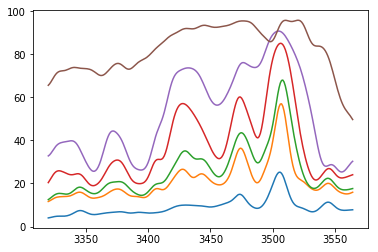

In [4]:
times = timesA
for time in times:
    plot(WT_alvino[WT_alvino.chr == 6]["%HL: "+"tp%s" % time])

In [5]:
## Organize the data: CNT as a function of time for each genome
# CNT = (time,genome_length)

In [6]:
CNT = []
for time,time_c in zip(times,times_c):
    CNT.append(np.array(WT_alvino[WT_alvino.chr == 6]["%HL: "+"tp%s" % time]))
CNT = np.array(CNT)

# Fit of one locus as a function of time
in order to compute when is the time at which 50 % is replicated which is going to be the definintion of mean replication time

[ 9.01800535  0.03047592]
Trep = 31.7620998974


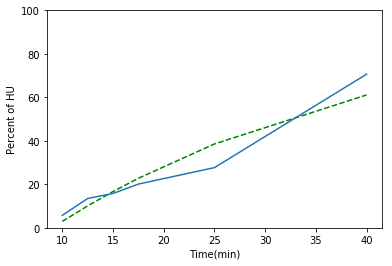

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

def func(t,a,b):
    return 100*(1-np.exp(-(t-a)*b))

xdata= times_c
ydata = CNT[::,40]
popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
print(popt)
plot(xdata, func(xdata, *popt), 'g--')
plot(xdata,ydata)
print("Trep =",popt[0]-np.log(0.5)/popt[1] )
#def Trep(times,x):
ylim(0,100)
xlabel("Time(min)")
ylabel("Percent of HU");
    

# fit of all locus on the chromosome

In [8]:
Trep = []
p0 = [9,0.05]
for xi in CNT.T:
    xdata= times_c
    ydata=xi
    popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
    Trep.append(popt[0]+np.log(2)/popt[1] )
    

# And plot the MRT for chromosome 6

Text(0,0.5,'MRT')

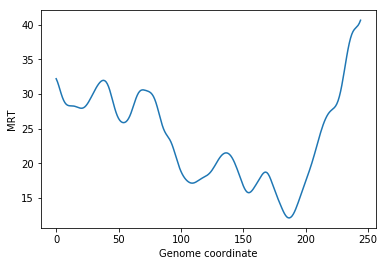

In [9]:
plot(Trep)
xlabel("Genome coordinate")
ylabel("MRT")

# Genome wide and for both replica

In [10]:


for times,rep in zip([timesA,timesB],["A","B"]):
    CNT = []
    for time,time_c in zip(times,times_c):
        CNT.append(np.array(WT_alvino["%HL: "+"tp%s" % time]))
    #plot(np.mean(CNT,axis=0)/100)
    CNT = np.array(CNT)

    Trep = []
    p0 = [9,0.05]
    for xi in CNT.T:
        xdata= times_c
        ydata=xi
        popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
        Trep.append(popt[0]+np.log(2)/popt[1] )
    #plot(Trep)
    
    WT_alvino["Trep%s" % rep] = Trep                               

# Inspect both replica for WT and chromosome 4

Text(0,0.5,'MRT')

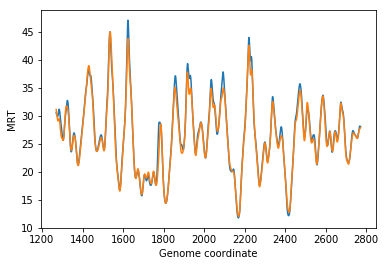

In [11]:
plot(WT_alvino[WT_alvino.chr == 4]["TrepA"])
plot(WT_alvino[WT_alvino.chr == 4]["TrepB"])
xlabel("Genome coordinate")
ylabel("MRT")

In [12]:
WT_alvino.to_csv("Yeast_wt_alvino.csv")

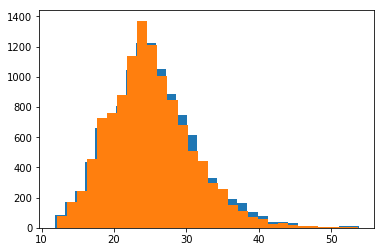

In [13]:
hist(WT_alvino["TrepA"],bins=30)
hist(WT_alvino["TrepB"],bins=30);

# Detect the peaks for both replica with triangular function

In [14]:
for rep in ["A","B"]:
    yes_no = []
    for ch in range(1,17):
        CNT = WT_alvino[WT_alvino.chr == ch]["Trep"+rep]
        yes_no.append(0)
        for i,j,k in zip(CNT[2:],CNT[1:-1],CNT[:-2]):
            if i>j and k > j:
                yes_no.append(1)
            else:
                yes_no.append(0)
        yes_no.append(0)
    #print(len(yes_no),len(WT_alvino))
    print(np.sum(yes_no))
    WT_alvino["peak"+rep] = yes_no

    

270
270


# plot the peaks against the profile for chromosome 6

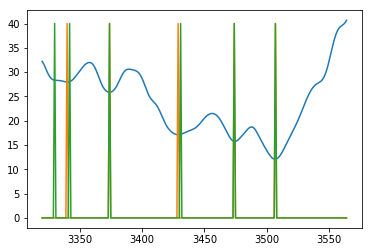

In [15]:
plot(WT_alvino[WT_alvino.chr == 6]["TrepA"])
plot(WT_alvino[WT_alvino.chr == 6]["peakA"]*40)
plot(WT_alvino[WT_alvino.chr == 6]["peakB"]*40)

#plot(WT_alvino[WT_alvino.chr == 4]["TrepB"])

# Histogram of the timing of each peak

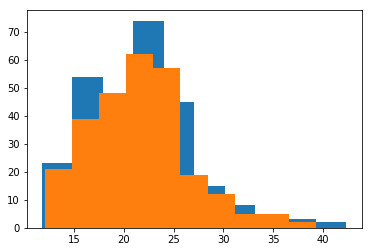

In [16]:
hist(WT_alvino["TrepA"][list(map(bool,WT_alvino["peakA"]))])
hist(WT_alvino["TrepB"][list(map(bool,WT_alvino["peakB"]))]);

# Compute f(t)

[ 26.17685502   0.08072742]
[ 24.82378842   0.08297167]
[ 26.31262582   0.07477522]
[ 20.65495495   0.08109502]
[ 27.25998931   0.07762464]
[ 24.45240879   0.08439825]
[ 24.24917395   0.07523033]
[ 26.42168296   0.0806465 ]
[ 26.66614025   0.08714301]
[ 24.64906043   0.08611757]
[ 25.10128239   0.07634191]
[ 26.22326899   0.0894592 ]
[ 26.5855751    0.07727257]
[ 25.79759618   0.08405274]
[ 28.16144936   0.0776079 ]
[ 26.46065239   0.08326681]
[ 26.56887889   0.08887219]
[ 25.97780206   0.08173455]
[ 25.29860553   0.08135526]
[ 26.01743489   0.07619636]
[ 20.75725005   0.08482157]
[ 26.96546275   0.07877614]
[ 24.32066791   0.08604236]
[ 24.34979628   0.0762616 ]
[ 26.21512431   0.08150364]
[ 26.40667078   0.08819718]
[ 24.56964177   0.08724057]
[ 24.96649469   0.07764015]
[ 25.89887599   0.09072918]
[ 26.36120792   0.07857876]
[ 25.60462974   0.08436167]
[ 27.84689169   0.07832926]
[ 26.29057242   0.08378496]
[ 26.41875721   0.08866269]


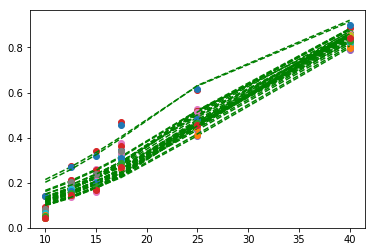

In [17]:
D = pd.DataFrame({"Time":times_c})
Optp = {}
for times,rep in zip([timesA,timesB],["A","B"]):
    fracDNA = []

    times_c= np.array(times_c)
    for time in times:
        fracDNA.append(np.sum(WT_alvino["%HL: "+"tp%s" % time])/100/len(WT_alvino))
    plot(times_c,fracDNA,"o")
    D["f(t)" + rep] = fracDNA
    
    
    def func(t,a,b):
        #b=0.2
        #print(t,a,b)
        return 1/(1+np.exp(-b*1.5*(t-a)))


    popt, pcov = curve_fit(func, np.array(times_c), fracDNA,p0=[25,0.15],bounds=[[10,0.01],[50,0.5]])
    print(popt)
    #popt = [25,0.15]
    plot(times_c, func(np.array(xdata), *popt), 'g--')
    #print(func(np.array(xdata), *popt))
    Optp["f(t)" + rep] = popt
    
    
    for ch in range(1,17):
        fracDNA = []
        for time in times:
            fracDNA.append(np.sum(WT_alvino[WT_alvino.chr == ch]["%HL: "+"tp%s" % time])/100/len(WT_alvino[WT_alvino.chr == ch]))
        plot(times_c,fracDNA,"o")
        D["f(t)_%i"%ch + rep] = fracDNA
        
    


        popt, pcov = curve_fit(func, np.array(times_c), fracDNA,p0=[25,0.15],bounds=[[10,0.01],[50,0.5]])
        print(popt)
        #popt = [25,0.15]
        plot(times_c, func(np.array(xdata), *popt), 'g--')
        Optp["f(t)_%i"%ch  + rep] = popt
    
   



# Plot for larger extent of time

[ 26.17685502   0.08072742]
[ 25.97780206   0.08173455]


Text(0,0.5,'Fraction of DNA')

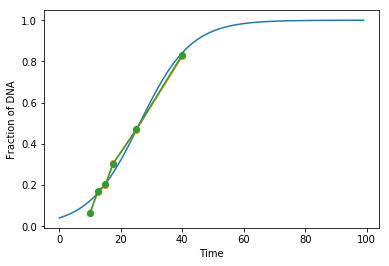

In [18]:
dt=1
Time= np.arange(0,100,dt)
plot(Time,func(Time,*Optp["f(t)A"]))
for rep in ["A","B"]:
    plot(times_c,D["f(t)" + rep],"-o")
    print(Optp["f(t)" + rep])
xlabel("Time")
ylabel("Fraction of DNA")

# And now global I(t) and f(t)

In [19]:
def Ith(t,v,a,b):
      return v*b**2*np.exp(-v*(t-a)*b)/(1+np.exp(-v*(t-a)*b))**2 / 2 

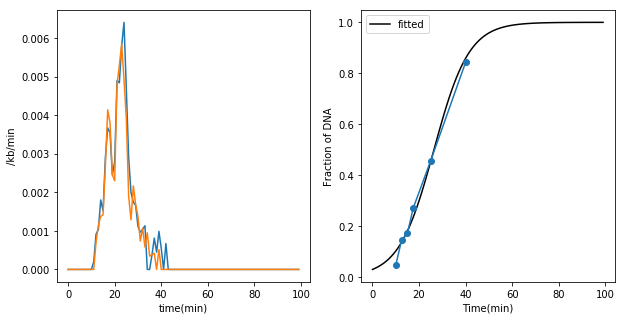

In [20]:
f = figure(figsize=(10,5))
ax = f.add_subplot(121) 
npoints = None

D = pd.DataFrame({"Time":Time[:npoints]})
peak_time_A = WT_alvino["TrepA"][list(map(bool,WT_alvino["peakA"]))]
peak_time_B = WT_alvino["TrepB"][list(map(bool,WT_alvino["peakB"]))]

for peak_time,rep in zip([peak_time_A,peak_time_B],["A","B"]):
    
    I = []
    for time in Time[:npoints]:
        n = np.sum( (peak_time > time -dt/2) & (peak_time < time +dt) )
        unrep = (1-func(time,*Optp["f(t)"+rep])) * len(WT_alvino)
        I.append(n/unrep/dt)
    
    plot(Time[:npoints],I)
    D["I_rep"+rep] = I
    
    #plot(D["Time"][:50],Ith(D["Time"][:50],1.5,*Optp["f(t)"+rep]))

    
    
    for ch in range(1,17):
        I = []
        peak_time = WT_alvino[WT_alvino.chr == ch]["Trep" +rep][list(map(bool,WT_alvino[WT_alvino.chr == ch]["peak" + rep]))]
        for time in Time[:npoints]:
            n = np.sum( (peak_time > time -dt/2) & (peak_time < time +dt) )
            unrep = (1-func(time,*Optp["f(t)_%i"%ch+rep])) * len(WT_alvino[WT_alvino.chr == ch])
            I.append(n/unrep/dt)

        #plot(Time[:npoints],I)
        D["I_rep_%i"%ch+rep] = I
    

ylabel("/kb/min")
xlabel("time(min)");

ax = f.add_subplot(122) 
D["frac"] = func(Time[:npoints],*popt)
plot(Time,func(Time,*popt),"-k",label="fitted")

plot(times_c,fracDNA,"-o")
xlabel("Time(min)")
ylabel("Fraction of DNA")
legend(loc="best")
D.to_csv("Alvino_WT.csv")

In [24]:
# And individuals I(t) and f(t)

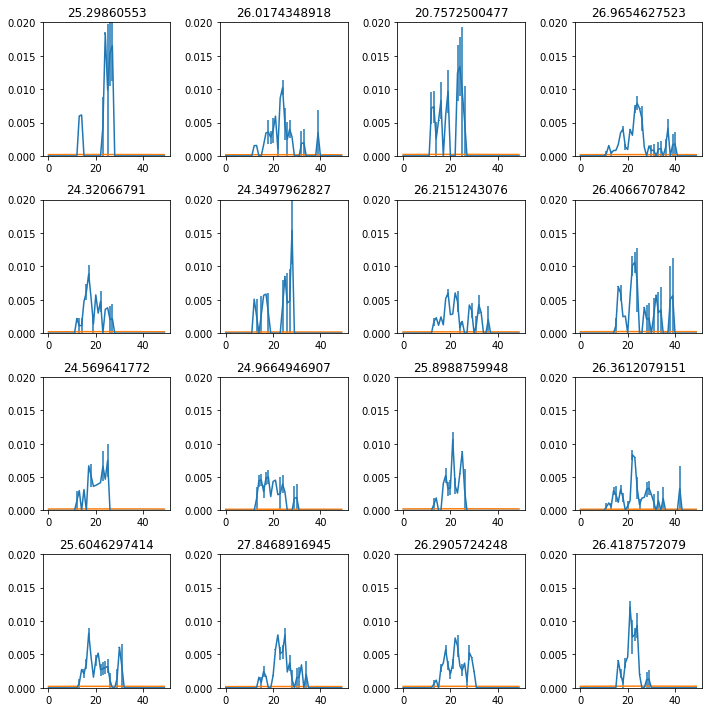

In [21]:
f = figure(figsize=(10,10))
INo = pd.DataFrame({"name":["chr%i" %i for i in range(1,17)]})
Imax = []
Imaxth= []


                   
for ch in range(1,17):
    ax = f.add_subplot(4,4,ch)
    r = []
    for rep in ["A","B"]:
        r.append(D["I_rep_%i"%ch+rep])
    errorbar(D["Time"][:50],np.average(r,axis=0)[:50],np.std(r,axis=0)[:50])
    plot(D["Time"][:50],Ith(D["Time"][:50],.25,*Optp["f(t)_%i"%ch+rep]))
    title(Optp["f(t)_%i"%ch+rep][0])
    Imax.append(max(np.average(r,axis=0)[:50]))
    Imaxth.append(max(Ith(D["Time"][:50],1.5,*Optp["f(t)_%i"%ch+rep])))
    
    
    ylim(0,0.02)
f.tight_layout()
INo["Imax"] = Imax
INo["Imaxth"] = Imaxth

In [22]:
Ori = pd.read_csv("../../data/external/oridb.csv","\t")
#print(Ori)
INo["nori"] = [len(Ori[Ori.chr == i]) for i in range(1,17)]

info = pd.read_csv("../../data/external/saccharomyces_cerevisiae_R64-2-1_20150113.gff",sep="\t",comment="#",
           names=["chr","sgd","type","start","end","un1","un2","un3","idd"])
info.head(20)
INo["chrlength"] = [info.iloc[i]["end"] for i,is_ch in enumerate(info["type"]=="chromosome") if is_ch][:-1]


/home/jarbona/miniconda3/envs/ifromprof/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


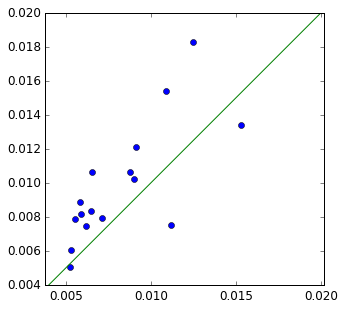

In [23]:
figure(figsize=(5,5))
style.use('classic')
INo["rho"] = 1000 *INo["nori"] / INo["chrlength"]
INo["Estimated Imax"] = 1.5*INo["rho"]**2
plot(1.5*INo["rho"]**2,INo["Imax"],"o")
plot([0.004,0.020],[0.004,0.020])
#for ch,x,y in zip(INo.name,1.5*INo["rho"]**2,INo["Imax"]):
    #print(ch,x,y)
    #annotate(ch,[x,y])
xlim(0.004,0.020)
ylim(0.004,0.020)
axis("equal")
INo.to_csv("single_ch_analysis_WT.csv")